## Лабораторная работа 3
# Моделирование непрерывной случайной величины
## Распределение хи-квадрат

### Выполнил:
Журик Никита Сергеевич, \
4 курс, 6 группа
### Преподаватель:
Пирштук Иван Казимирович, \
канд. физ.-мат. наук

In [1]:
import numpy as np
import scipy as sp
from scipy import stats

import sys
sys.path.append('../')

from utils import *
from BaseUniform.statmod1 import UniformDistribution

Сгенерируем стандартное нормальное распределение с помощью самого простого алгоритма, основанного на ЦПТ: сложим 12 равномерно распределённых СВ и вычтем 6. Полученная СВ будет иметь распределение, близкое к нормальному (естественно, результат никогда не окажется вне отрезка $[-6; 6]$, но вероятность попасть за пределы этого отрезка и так крайне мала). Строго говоря, данная СВ имеет распределение Ирвина-Холла ([wikipedia](https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution))

Существуют значительно лучшие алгоритмы (например, алгоритм Зиккурат), данный алгоритм был выбран лишь из-за простоты реализации и скорости работы.

In [2]:
class StandardNormalDistribution:
    def __init__(self, seed: int = 42):
        self.uniform = UniformDistribution(seed=seed)
        
    def mean(self):
        return 0
        
    def __call__(self, shape: tuple = (1,)):
        return np.sum(self.uniform(tuple([*shape, 12])), axis=-1) - 6

Теперь можем реализовать распределение хи-квадрат по определению как сумму квадратов $k$ нормально распределённых СВ.

In [3]:
class ChiSquareDistribution:
    def __init__(self, k: int = 1, seed: int = 42):
        self.stdnorm = StandardNormalDistribution(seed=seed)
        self.k = k
        
    def mean(self):
        return self.k
        
    def __call__(self, shape: tuple=(1,)):
        return np.sum(self.stdnorm(tuple([*shape, self.k])) ** 2, axis=-1)

In [4]:
def rv_test_pipeline_chi2(dist, np_dist, dist_cdf):
    
    sampling_sizes = [30, 50, 100, 300, 500, 1000]

    seqs = []
    means = []
    stds = []

    np_seqs = []
    np_means = []
    np_stds = []

    for sampling_size in sampling_sizes:
        generated = dist(shape=(sampling_size,))
        np_seqs.append(np_dist(size=sampling_size))
        seqs.append(generated)
        means.append(seqs[-1].mean())
        stds.append(seqs[-1].std())
        np_means.append(np_seqs[-1].mean())
        np_stds.append(np_seqs[-1].std())
        print(f'Mean for {sampling_size} values: {means[-1]}')
        print(f'Std for {sampling_size} values: {stds[-1]}')

    means = np.array(means)
    stds = np.array(means)
    np_means = np.array(np_means)
    np_stds = np.array(np_stds)
    plot_conv_comparison(sampling_sizes, means, np_means, exact_mean=dist.mean())
    plot_autocov_comparison(seqs[-1], np_seqs[-1])
    plot_scatter_comparison(seqs[3], np_seqs[3])
    plot_hist_comparison(seqs[3], np_seqs[3])
    
    n_bins_chi2 = 5
    EPS = 0.05

    for i in range(len(seqs)):
        seq = seqs[i]
        p_value = find_chi2_p_value(chi2(seq, dist_cdf, k=n_bins_chi2), r=n_bins_chi2-1)
        np_p_value = find_chi2_p_value(chi2(np_seqs[i], dist_cdf, k=n_bins_chi2), r=n_bins_chi2-1)
        print(f'P-value for seq with {seq.size} elements: {p_value}')
        print(f'P-value for np with {seq.size} elements: {np_p_value}')
        print(f'Null-hypothesis (chi2 distributed) is correct: {p_value > EPS}')
        print()

First of all, compare standard normal distributions:

Mean for 30 values: -0.16968446949947832
Std for 30 values: 0.926832824502186
Mean for 50 values: 0.049489555055969164
Std for 50 values: 0.9337798298737878
Mean for 100 values: -0.08947410425146778
Std for 100 values: 0.9685647188120731
Mean for 300 values: 0.03968802569264294
Std for 300 values: 1.0704729509486426
Mean for 500 values: -0.02421896556961301
Std for 500 values: 0.9203527090909482
Mean for 1000 values: -0.04410066597075233
Std for 1000 values: 1.0593116531160491


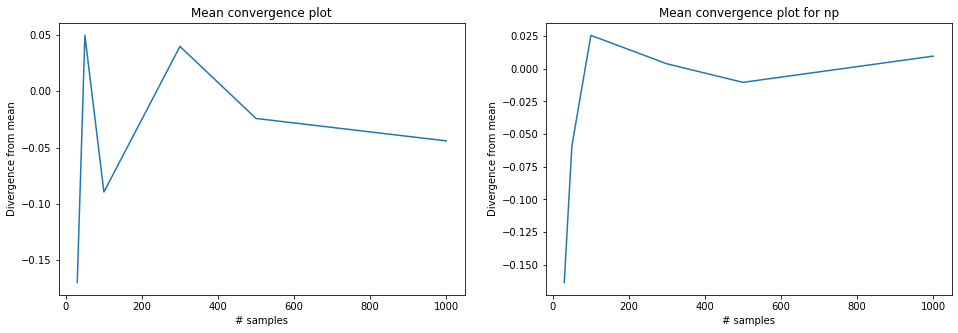

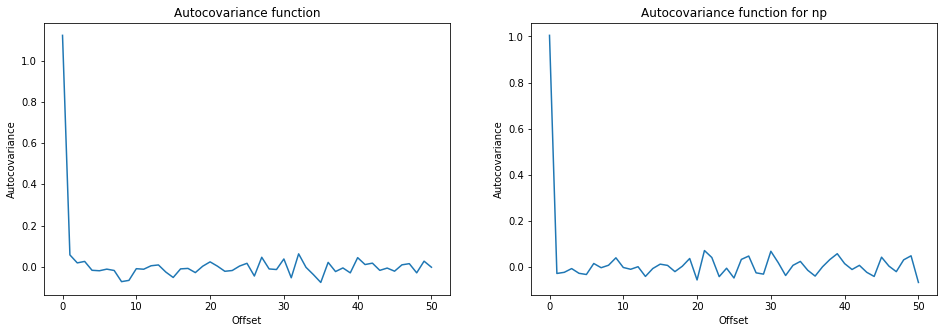

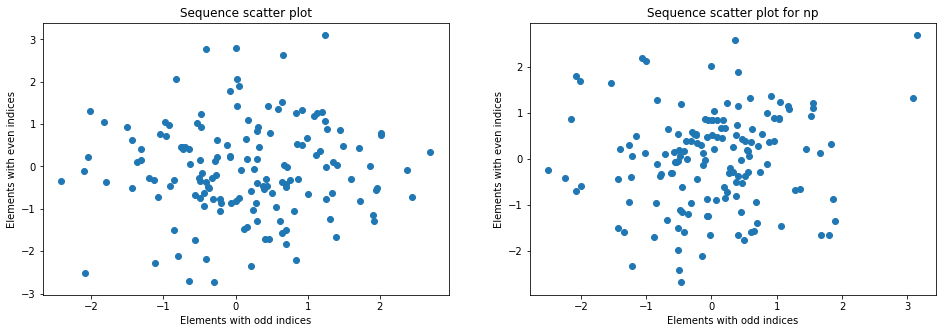

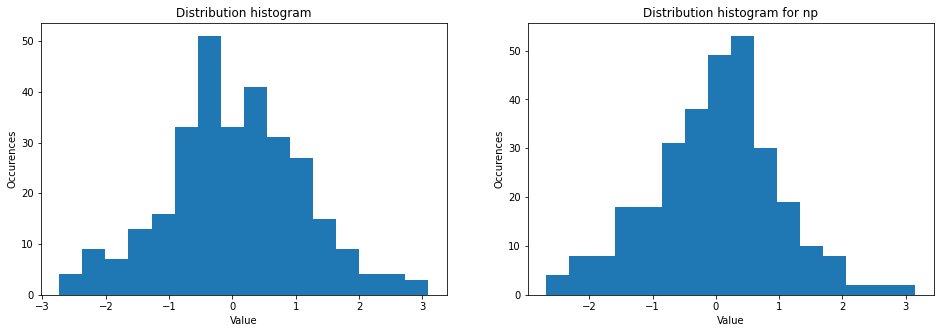

P-value for seq with 30 elements: 0.9947505955011874
P-value for np with 30 elements: 0.18391963521565557
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 50 elements: 0.015429573294239773
P-value for np with 50 elements: 0.346525075352081
Null-hypothesis (chi2 distributed) is correct: False

P-value for seq with 100 elements: 0.9359042990050663
P-value for np with 100 elements: 0.2813944484176588
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 300 elements: 0.949258007720049
P-value for np with 300 elements: 0.08276802326785937
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 500 elements: 0.03361206834083286
P-value for np with 500 elements: 0.2507693469797805
Null-hypothesis (chi2 distributed) is correct: False

P-value for seq with 1000 elements: 0.6075015721051863
P-value for np with 1000 elements: 0.9374658515914039
Null-hypothesis (chi2 distributed) is correct: True


And now chi-square:

Mean for 30 val

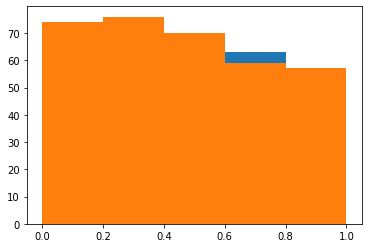

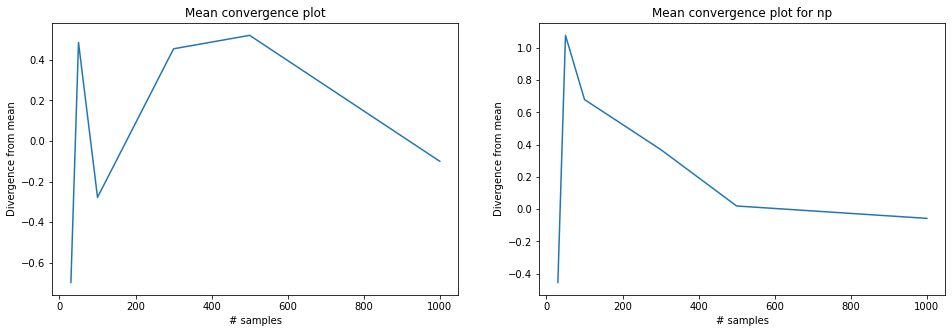

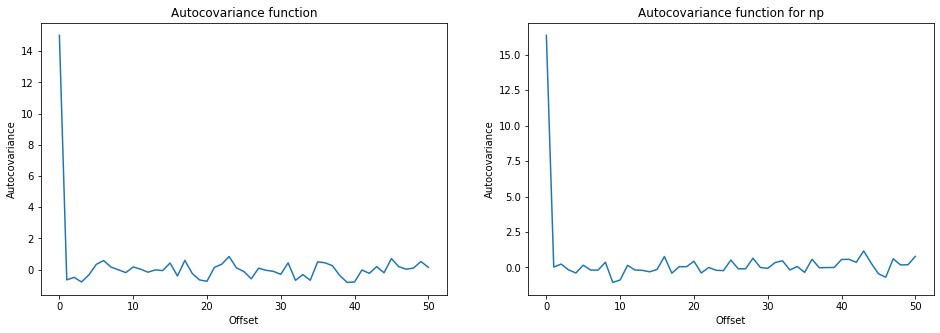

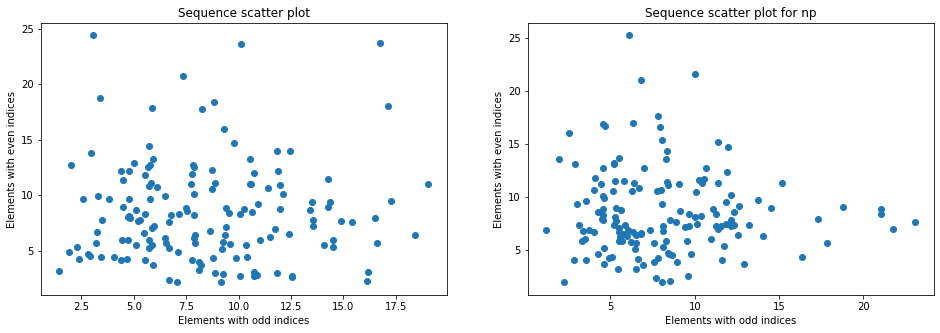

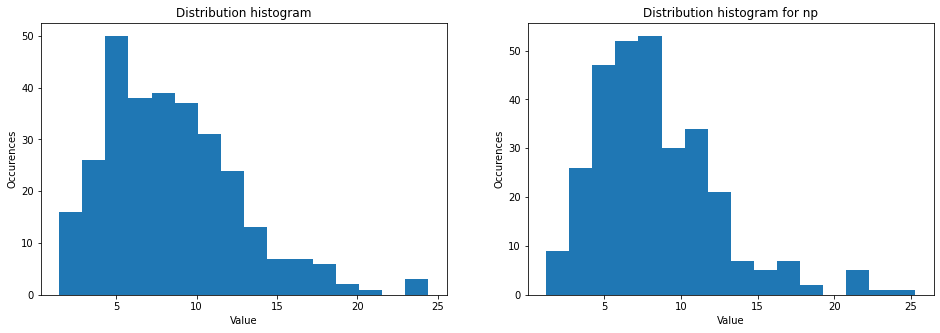

P-value for seq with 30 elements: 0.9996608164991518
P-value for np with 30 elements: 0.9996608164991518
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 50 elements: 0.99906873004549
P-value for np with 50 elements: 0.99906873004549
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 100 elements: 0.9963815162211257
P-value for np with 100 elements: 0.9963815162211257
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 300 elements: 0.9709728801548593
P-value for np with 300 elements: 0.9709728801548593
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 500 elements: 0.5841759860181404
P-value for np with 500 elements: 0.9280051455042341
Null-hypothesis (chi2 distributed) is correct: True

P-value for seq with 1000 elements: 0.7887701484715754
P-value for np with 1000 elements: 0.46847982134768595
Null-hypothesis (chi2 distributed) is correct: True



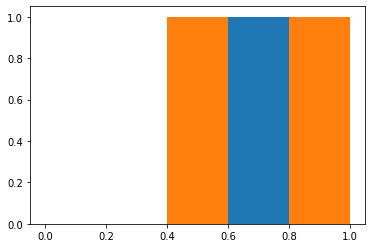

In [5]:
if __name__ == "__main__":
    rng = np.random.default_rng()
    
    print("First of all, compare standard normal distributions:\n")
    
    rv_test_pipeline_chi2(StandardNormalDistribution(seed=100500),
                          lambda size: rng.normal(0, 1, size=size),
                          lambda x: 0.5 * (1 + sp.special.erf(x / np.sqrt(2))))
    
    print()
    print("And now chi-square:\n")
    
    rv_test_pipeline_chi2(ChiSquareDistribution(k=8, seed=100500),
                          lambda size: rng.chisquare(8, size=size),
                          lambda x: sp.special.gammainc(4, x / 2))

# Выводы

1. Можно видеть, что сгенерированное стандартное нормальное распределение достаточно хорошо, хоть и уступает аналогу из numpy. Скорее всего это связано с тем, что алгоритм генерации всё же примитивен.
2. В случае же распределения хи-квадрат p-value падает с увеличением размера выборки как у моего генератора, так и у генератора из numpy. Возможно, это связано с тем, что для генерации большой выборки из распределения хи-квадрат необходимо сгенерировать k выборок из стандартного нормального распределения. Из-за этого могут проявляться недостатки генератора нормального распределения.
3. Тем не менее, для маленького и среднего размера выборок генератор работает удовлетворительно: выборочное среднее сходится к теоретическому матожиданию, автоковариация колеблется около нуля, гистограммы и диаграммы рассеяния выглядят правдоподобно.